# Introduction #

In this project we will use CAPM [Capital asset pricing model] to statistically find the expected daily return of selected technological stocks: Amazon and Yahoo. This daily expected return can be used to predict next day stock value given the condition we have current stock price. Following formula can be used to predict next day stock price:

**Next Day stock price = Today's stock Price * (1+Daily expected return)**

Daily expected return will be calculated using CAPM model. Daily expected return sensitivity in CAPM terminology is also known as beta. In this project beta will be calculated based on two time frames:

- **Time frame 1 = [01/01/2000 to 12/31/2016] 16 years of data** 
- **Time frame 2 = [01/01/2006 to 12/31/2016] 10 years of data**
 

Above two time frames will be **our training data set**. We will use this training data set to predict stock price for test data set which will comprise of time frame:


**Test data time frame: 01/01/2017 to 11/16/2017**

Then we will run the statistically analysis on the test data to evaluate if 16 years of training data produced more accurate result or else it added noise compared to 10 years of training data.


# CAPM Model  #

This model can be used to evaluate the theoretical expected return on a security, security can be any financial object such as stocks, put option, call option, bonds, and etc. In CAPM model we evaluate how much financial object is sensitive to the market using statistical analysis. Then this sensitivity which is also known as beta is used to find the expected return on security. This expected return can be on daily basis, weekly basis, monthly basis or yearly. Here is the formula to evaluate expected return:


$$E(R_{i}) = r_{f} + \beta_{i}(E(r_{m}) - r_{f})$$

Where
 
- $E(R_{i})$ is expected return 
- $r_{f}$ is risk free interest rate example: Government bond
- $E(r_{m})$ is return on market example S&P 500
- $\beta_{i}$ is sensitivity of stock with respect to market  

$\beta_{i}$ can further be defined how much stock is sensitive to the stock market. Example if $\beta_{i}$  for a particular stock is two it means if market goes up by five percent then stock will go up by ten percent and if if market goes down by 2 percent then stock will go down by ten percent. In terms of statistics $\beta_{i}$  is defined as:

$$\beta_{i}  = \frac{Cov(R_{i},r_{m})}{Var(r_{m})}$$

In [1]:
#used to fetch finance data from google/yahoo
from pandas_datareader import data as dr 

In [2]:
#used to manipulate multi dimension arrays 
import numpy as np 

In [3]:
#used for plotting graphs 
import matplotlib.pyplot as plt 

In [4]:
# used for data manipulation and analysis 
import pandas as pd 

In [5]:
# format date time
import datetime  

In [6]:
# used for statistical analysis 
import statsmodels.api as sm 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
# used to run regression 
from statsmodels import regression 

In [8]:
from sklearn.metrics import mean_squared_error   # used to run root mean square analysis 
from math import sqrt

**Initialize the stock ticker**

In [9]:
amazon = 'AMZN'   #'AMAZON' 
yahoo = 'VZ'    # We are using verizon as ticker since Verizon acquired Yahoo 
market = 'SPY'  # S&P 500

**Initilize Time frame 1**

In [10]:
start_date = datetime.datetime(2000, 1, 1) 
end_date = datetime.datetime(2016, 12, 31)

**Fetch Data from Yahoo finance**

In [11]:
amazonData = dr.get_data_yahoo(amazon,start_date,end_date)
yahooData = dr.get_data_yahoo(yahoo,start_date,end_date)
marketData = dr.get_data_yahoo(market,start_date,end_date)

In [12]:
amazonData.tail()  # Retrieve last 5 rows to look at a amazon data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,764.549988,766.500000,757.989990,760.590027,760.590027,1976900
2016-12-27,763.400024,774.650024,761.200012,771.400024,771.400024,2638700
2016-12-28,776.250000,780.000000,770.500000,772.130005,772.130005,3301000
2016-12-29,772.400024,773.400024,760.849976,765.150024,765.150024,3153500
2016-12-30,766.469971,767.400024,748.280029,749.869995,749.869995,4139400


In [13]:
yahooData.tail()  #Retrieve last 5 rows to look at yahoo data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,53.650002,53.750000,53.439999,53.680000,51.192329,7193800
2016-12-27,53.689999,53.830002,53.439999,53.639999,51.154182,6255400
2016-12-28,53.630001,53.830002,53.369999,53.439999,50.963444,6849500
2016-12-29,53.590000,53.900002,53.509998,53.740002,51.249546,7105400
2016-12-30,53.549999,53.639999,53.169998,53.380001,50.906227,12440800


In [14]:
marketData.tail() # retrieve last 5 rows to look at market data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,222.537308,36251400
2016-12-27,226.020004,226.729996,226.000000,226.270004,223.089447,42672500
2016-12-28,226.570007,226.589996,224.270004,224.399994,221.245697,64095000
2016-12-29,224.479996,224.889999,223.839996,224.350006,221.196426,47719500
2016-12-30,224.729996,224.830002,222.729996,223.529999,220.387939,108998300


**Since we are interested in daily return, we fetched the daily data from yahoo finance which is evident 
from the above result data set. Now lets find the percentage change on the daily Close value to get the percentage change array which in finance terminology will be daily return on stock**

In [15]:
return_amazon = amazonData.Close.pct_change()[1:]
return_yahoo  = yahooData.Close.pct_change()[1:]
return_market = marketData.Close.pct_change()[1:]

**Daily returns array on amazon, yahoo and market stocks looks like:**

In [16]:
return_amazon.tail() # Amazon stock returns array

Date
2016-12-23   -0.007503
2016-12-27    0.014213
2016-12-28    0.000946
2016-12-29   -0.009040
2016-12-30   -0.019970
Name: Close, dtype: float64

In [17]:
return_yahoo.tail()  # Yahoo stock return array

Date
2016-12-23    0.000559
2016-12-27   -0.000745
2016-12-28   -0.003729
2016-12-29    0.005614
2016-12-30   -0.006699
Name: Close, dtype: float64

In [18]:
return_market.tail() # Market S&P 500 return array

Date
2016-12-23    0.001464
2016-12-27    0.002481
2016-12-28   -0.008265
2016-12-29   -0.000223
2016-12-30   -0.003655
Name: Close, dtype: float64

**Lets plot amazon, yahoo and market return on graph to visualize the sensitivity of amazon and yahoo stocks with 
respect to market**

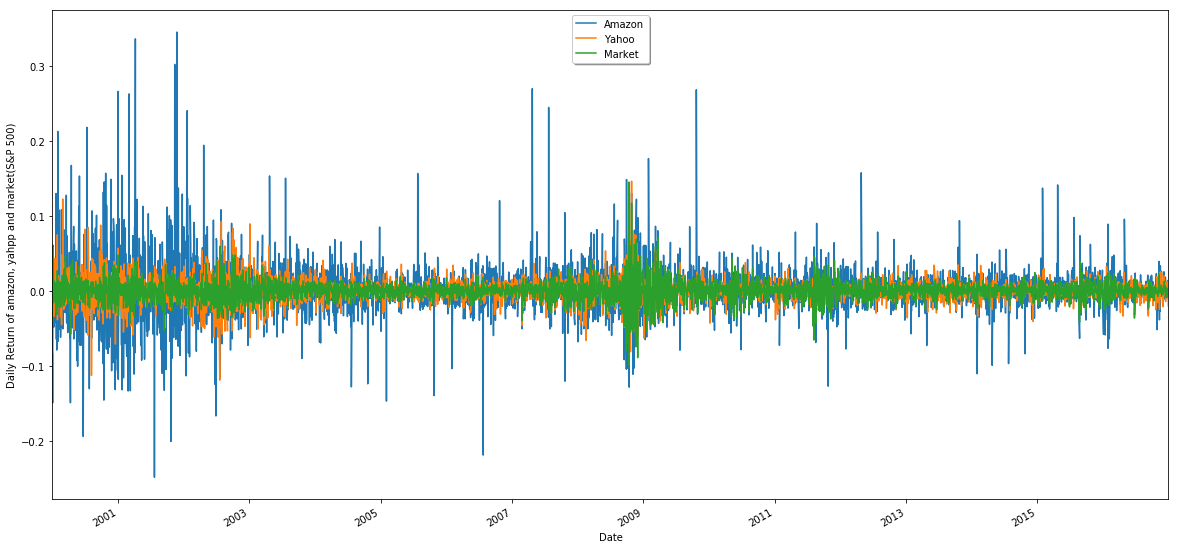

In [19]:
plt.figure(figsize=(20,10))
return_amazon.plot(label='Amazon')
return_yahoo.plot(label='Yahoo')
return_market.plot(label='Market')
plt.legend(('Amazon', 'Yahoo', 'Market'),
           loc='upper center', shadow=True)
plt.ylabel("Daily Return of amazon, yahpp and market(S&P 500)")
plt.show()

**Assign return values to array variable X and Y**

In [20]:
X1 = return_amazon.values # put return values of amazon in an array X1
X2 = return_yahoo.values  # put return values of yahoo in an array X2
Y  = return_market.values # put return values of market in an array Y



**We will use the formula for beta as explained above to find the beta for Amazon and Yahoo**

In [21]:
beta_amazon = np.cov(X1,Y)[0][1]/np.var(Y)
beta_yahoo = np.cov(X2,Y)[0][1]/np.var(Y)


**Print amazon and yahoo beta, beta as discussed earlier is nothing but a sensitivity of stock with market**

In [22]:
print("Amazon Beta: "+ str(beta_amazon))
print("Yahoo Beta: " + str(beta_yahoo))

Amazon Beta: 1.27101548261
Yahoo Beta: 0.718291401155


**Now this beta will be used to predict the expected returns for the stocks: Amazon and Yahoo for the testing period and these expected return values will be compared to the actual returns and will validate how close expected return values are to the acual returns using the root square mean deviation. This deviation model is based on the 16 years of data. We will again run the root square mean deviation on the 10 years of data to arrive at conclusion if adding more data gives us more accurate result or it adds noise**

**Test data time frame: 01/01/2017 to 11/16/2017**

**Now, lets Initialize testing time frame**

In [23]:
start_date_testing = datetime.datetime(2017, 1, 1) 
end_date_testing   = datetime.datetime(2017, 11, 16)

**Fetch data from yahoo finance for Amazon and Yahoo for testing time frame**

In [24]:
amazonTestingData = dr.get_data_yahoo(amazon,start_date_testing,end_date_testing)
yahooTestingData = dr.get_data_yahoo(yahoo,start_date_testing,end_date_testing)
marketTestingData = dr.get_data_yahoo(market,start_date_testing,end_date_testing)

In [25]:
amazonTestingData.tail()  # retrieve recnt 5 rows of amazon data for testing period 


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,1126.099976,1131.750000,1124.060059,1125.349976,1125.349976,2179900
2017-11-13,1123.000000,1139.900024,1122.339966,1129.170044,1129.170044,2918400
2017-11-14,1130.109985,1138.000000,1123.890015,1136.839966,1136.839966,3138400
2017-11-15,1127.010010,1131.750000,1121.630005,1126.689941,1126.689941,3928700
2017-11-16,1130.160034,1138.160034,1130.050049,1137.290039,1137.290039,2213300


In [26]:
yahooTestingData.tail() # retrieve recnt 5 rows of yahoo data for testing period 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,45.110001,45.110001,44.750000,44.880001,44.880001,17075000
2017-11-13,44.919998,45.080002,44.700001,44.750000,44.750000,16673900
2017-11-14,44.689999,44.849998,44.150002,44.220001,44.220001,20829900
2017-11-15,44.330002,44.380001,43.970001,44.110001,44.110001,15726500
2017-11-16,44.209999,44.880001,44.110001,44.770000,44.770000,13818000


In [27]:
marketTestingData.tail() # retrieve recnt 5 rows of market data for testing period 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,257.730011,258.290009,257.369995,258.089996,258.089996,59984700
2017-11-13,257.309998,258.589996,257.269989,258.329987,258.329987,50228600
2017-11-14,257.410004,257.850006,256.519989,257.730011,257.730011,61315200
2017-11-15,256.619995,257.220001,255.630005,256.440002,256.440002,80811500
2017-11-16,257.519989,259.040009,257.470001,258.619995,258.619995,67777000


**Since we are interested in daily return, we fetched the daily data from yahoo  finance which is evident from the above result data set. Now lets find the percentage change on the daily Close value to get the percentage change array for testing period which in finance terminology will be daily return on stock**

In [28]:
return_amazon_testing = amazonTestingData.Close.pct_change()[1:]
return_yahoo_testing  = yahooTestingData.Close.pct_change()[1:]
return_market_testing = marketTestingData.Close.pct_change()[1:]

**Lets take a look how stock return array looks like**

In [29]:
return_amazon_testing.tail()

Date
2017-11-10   -0.003348
2017-11-13    0.003395
2017-11-14    0.006793
2017-11-15   -0.008928
2017-11-16    0.009408
Name: Close, dtype: float64

In [30]:
return_yahoo_testing.tail()

Date
2017-11-10   -0.004216
2017-11-13   -0.002897
2017-11-14   -0.011844
2017-11-15   -0.002488
2017-11-16    0.014963
Name: Close, dtype: float64

In [31]:
return_market_testing.tail()

Date
2017-11-10   -0.000310
2017-11-13    0.000930
2017-11-14   -0.002323
2017-11-15   -0.005005
2017-11-16    0.008501
Name: Close, dtype: float64

**Lets plot amazon, yahoo and market return on graph to visualize the sensitivity of amazon and yahoo stocks with 
respect to market during the testing time fram**

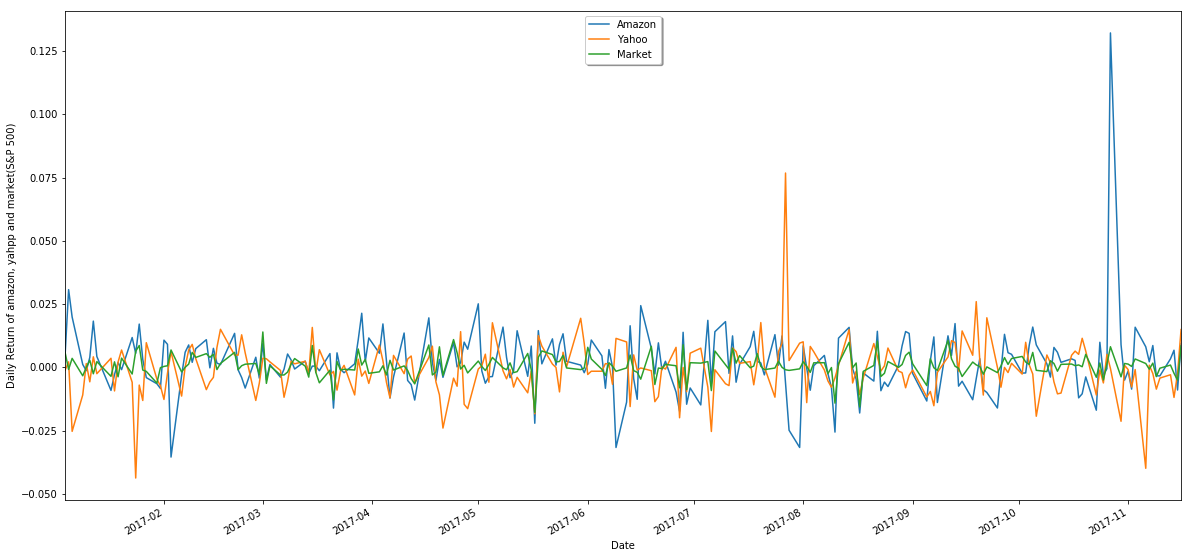

In [32]:
plt.figure(figsize=(20,10))
return_amazon_testing.plot(label='Amazon')
return_yahoo_testing.plot(label='Yahoo')
return_market_testing.plot(label='Market')
plt.legend(('Amazon', 'Yahoo', 'Market'),
           loc='upper center', shadow=True)
plt.ylabel("Daily Return of amazon, yahpp and market(S&P 500)")
plt.show()

**Translate the return values to an array. Please note these are actual returns - fetched from yahoo finance**

In [33]:
X_amazon_actualReturns = return_amazon_testing.values # put return values of amazon in an array X1
X2_yahoo_actualReturns = return_yahoo_testing.values  # put return values of yahoo in an array X2
Y_market_actualReturns = return_market_testing.values # put return values of market in an array Y

**Now in order to evaluate expected return for the testing period based on the calculated beta we need to calculate the risk free rate $r_{f}$ as mentioned above in the CAPM formula. Please note below formula will fetch the annualized rate but here we are dealing with the daily returns so this needs to be normalized to daily rate. Here we are using Treas Yld Index-10 Yr Nts bond**

In [34]:
riskFreeAnnualRate = dr.get_data_yahoo('^TNX',datetime.datetime(2017, 11, 18) ,datetime.datetime(2017, 11, 18) ).values[0][4]
# get_data_yahoo will return columns: Open 	High 	Low 	Close 	Adj Close 	Volume
# dot values will convert to 2 dimensional array and then used index [0][4] to fetch annual rate

In [35]:
riskFreeDailyRate = (1+riskFreeAnnualRate)**(1/365) -1  # since compound interest works exponentially 

**Lets copy the content of X_amazon_actualReturns to new array X_amazon_predictedReturns and initialized each element in X_amazon_predictedReturns using CAPM model => $E(R_{i}) = r_{f} + \beta_{i}(E(r_{m}) - r_{f})$ as dicussed above in Introduction. We will do the same for Yahoo stocks**

In [36]:
X_amazon_predictedReturns = list(X_amazon_actualReturns)
i = 0
while i < len(X_amazon_predictedReturns):
    X_amazon_predictedReturns[i] = riskFreeDailyRate + beta_amazon*(Y_market_actualReturns[i]-riskFreeDailyRate)
    i += 1


X2_yahoo_preddictedReturns = list(X2_yahoo_actualReturns)
i = 0
while i < len(X_amazon_predictedReturns):
    X2_yahoo_preddictedReturns[i] = riskFreeDailyRate + beta_yahoo*(Y_market_actualReturns[i]-riskFreeDailyRate)
    i += 1

In [37]:
rms_amazon = sqrt(mean_squared_error(Y_market_actualReturns, X_amazon_predictedReturns))
rms_yahoo  = sqrt(mean_squared_error(Y_market_actualReturns, X2_yahoo_preddictedReturns))
print('Root mean squar error for Amazon stocks analysis based on 16 years of data  '+str(rms_amazon))
print('Root mean squar error for Yahoo  stocks analysis based on 16 years of data  '+str(rms_yahoo))

Root mean squar error for Amazon stocks analysis based on 16 years of data  0.0013770649566793073
Root mean squar error for Yahoo  stocks analysis based on 16 years of data  0.001431398072661455


# Root mean squar error for Amazon stocks analysis based on 16 years of data  0.0013770649566793073
# Root mean squar error for Yahoo  stocks analysis based on 16 years of data  0.001431398072661455

**Now we we will do exact same analysis as mentioned above for 10 years of data instead of 16 years of data and will compare the root mean square error calculated based on 16 years of Data. Please note since we explained the code above we will just run the code and arrive at root mean square value to avoid textual redundancy**

In [39]:
start_date = datetime.datetime(2006, 1, 1) 
end_date = datetime.datetime(2016, 12, 31)

amazonData = dr.get_data_yahoo(amazon,start_date,end_date)
yahooData = dr.get_data_yahoo(yahoo,start_date,end_date)
marketData = dr.get_data_yahoo(market,start_date,end_date)

return_amazon = amazonData.Close.pct_change()[1:]
return_yahoo  = yahooData.Close.pct_change()[1:]
return_market = marketData.Close.pct_change()[1:]

X1 = return_amazon.values # put return values of amazon in an array X1
X2 = return_yahoo.values  # put return values of yahoo in an array X2
Y  = return_market.values # put return values of market in an array Y

beta_amazon = np.cov(X1,Y)[0][1]/np.var(Y)
beta_yahoo = np.cov(X2,Y)[0][1]/np.var(Y)

start_date_testing = datetime.datetime(2017, 1, 1) 
end_date_testing   = datetime.datetime(2017, 11, 16)

amazonTestingData = dr.get_data_yahoo(amazon,start_date_testing,end_date_testing)
yahooTestingData = dr.get_data_yahoo(yahoo,start_date_testing,end_date_testing)
marketTestingData = dr.get_data_yahoo(market,start_date_testing,end_date_testing)

return_amazon_testing = amazonTestingData.Close.pct_change()[1:]
return_yahoo_testing  = yahooTestingData.Close.pct_change()[1:]
return_market_testing = marketTestingData.Close.pct_change()[1:]

X_amazon_actualReturns = return_amazon_testing.values # put return values of amazon in an array X1
X2_yahoo_actualReturns = return_yahoo_testing.values  # put return values of yahoo in an array X2
Y_market_actualReturns = return_market_testing.values # put return values of market in an array Y

riskFreeAnnualRate = dr.get_data_yahoo('^TNX',datetime.datetime(2017, 11, 18) ,datetime.datetime(2017, 11, 18) ).values[0][4]
riskFreeDailyRate = (1+riskFreeAnnualRate)**(1/365) -1

X_amazon_predictedReturns = list(X_amazon_actualReturns)
i = 0
while i < len(X_amazon_predictedReturns):
    X_amazon_predictedReturns[i] = riskFreeDailyRate + beta_amazon*(Y_market_actualReturns[i]-riskFreeDailyRate)
    i += 1


X2_yahoo_preddictedReturns = list(X2_yahoo_actualReturns)
i = 0
while i < len(X_amazon_predictedReturns):
    X2_yahoo_preddictedReturns[i] = riskFreeDailyRate + beta_yahoo*(Y_market_actualReturns[i]-riskFreeDailyRate)
    i += 1
    

rms_amazon = sqrt(mean_squared_error(Y_market_actualReturns, X_amazon_predictedReturns))
rms_yahoo  = sqrt(mean_squared_error(Y_market_actualReturns, X2_yahoo_preddictedReturns))
print('Root mean squar error for Amazon stocks analysis based on 10 years of data  '+str(rms_amazon))
print('Root mean squar error for Yahoo  stocks analysis based on 10 years of data  '+str(rms_yahoo))


Root mean squar error for Amazon stocks analysis based on 10 years of data  0.0005310568868610347
Root mean squar error for Yahoo  stocks analysis based on 10 years of data  0.0014919678459654213


# Root mean squar error for Amazon stocks analysis based on 16 years of data 0.0013770649566793073
# Root mean squar error for Yahoo stocks analysis based on 16 years of data 0.001431398072661455

# Root mean squar error for Amazon stocks analysis based on 10 years of data  0.0005310568868610347
# Root mean squar error for Yahoo  stocks analysis based on 10 years of data  0.0014919678459654213

